In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = np.loadtxt('train_X.csv', delimiter = ',')
Y_train = np.loadtxt('train_label.csv', delimiter = ',')

X_test = np.loadtxt('test_X.csv', delimiter = ',')
Y_test = np.loadtxt('test_label.csv', delimiter = ',')

In [3]:
print("shape of X_train :", X_train.shape) # (number_of_images, pixels_of_an_image)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (1000, 784)
shape of Y_train : (1000, 10)
shape of X_test : (350, 784)
shape of Y_test : (350, 10)


In [4]:
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [5]:
print("shape of X_train :", X_train.shape) # (image_size, number_of_images)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (784, 1000)
shape of Y_train : (10, 1000)
shape of X_test : (784, 350)
shape of Y_test : (10, 350)


The image is : [8]


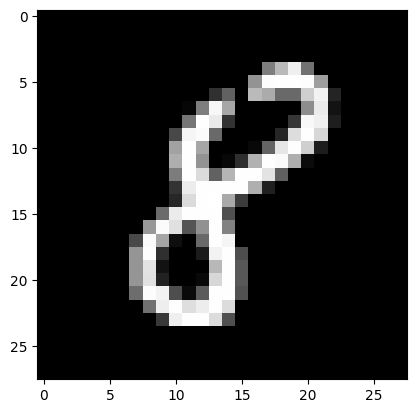

In [6]:
index_of_random_image = random.randrange(0, X_train.shape[1])
image_at_index = X_train[:,index_of_random_image].reshape(28, 28)
plt.imshow(image_at_index, cmap='gray')
target_index = np.where(Y_train[:,index_of_random_image] == 1)[0]
print(f'The image is : {target_index}')

# Model

## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$

$ \textcolor{yellow}{\text{Assuming our NN contains only 1 input layer, 1 Hidden layer and 1 output layer}} $


## *Repeat Below Steps for many times : *


## Forward Propagation 

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax 

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function 

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 


---
## Activation Functions

### ReLU Activation
$$
a_i = 
\begin{cases}
z_i, & z_i > 0,\\
0,   & z_i \le 0.
\end{cases}
$$

### Softmax Activation
$$
a_i =
\begin{cases}
\frac{e^{z_i}}{\sum_{k=1}^{n} e^{z_k}}, & \text{for } i = 1, 2, \dots, n
\end{cases}
$$


In [7]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

---
## Derivatives of Activation functions

In [8]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

---
## Initializing Parameters

$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$

In [9]:
# n_x : Total number of neurons in input layer
# n_h : Total number of neurons in hidden layer
# n_y : Total number of neurons in output layer

def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = dict(w1=w1, b1=b1, w2=w2, b2=b2)
    
    return parameters

---
## Forward Propogation
$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

In [20]:
def forward_propagation(x, parameters):
    
    w1, b1, w2, b2 = parameters['w1'], parameters['b1'], parameters['w2'], parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    # a1 = relu(z1)
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = dict(z1=z1, a1=a1, z2=z2, a2=a2)

    return forward_cache

---
## Cost Function
$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$

In [11]:
def cost_function(a2, y):
    m = y.shape[1]
    cost = -(1 / m) * np.sum(y * np.log(a2))
    return cost

---
## Back Propogation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

In [21]:
def backward_prop(x, y, parameters, forward_cache):
    w1, b1, w2, b2 = parameters['w1'], parameters['b1'], parameters['w2'], parameters['b2']
    a1, a2 = forward_cache['a1'], forward_cache['a2']

    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True) # keepdims = 1 : (2,) -> (2, 1) forces code to show complete dimentions
    
    # dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_relu(a1)
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = dict(dw1=dw1, db1=db1, dw2=dw2, db2=db2)
    
    return gradients

---
## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 

In [13]:
def update_parameters(parameters, gradients, alpha):
    w1, b1, w2, b2 = parameters['w1'], parameters['b1'], parameters['w2'], parameters['b2']
    dw1, db1, dw2, db2 = gradients['dw1'], gradients['db1'], gradients['dw2'], gradients['db2']

    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2

    params = dict(w1=w1, b1=b1, w2=w2, b2=b2)

    return params

---
# Final Model

In [22]:
def model(x, y, n_h, alpha, iterations):
    n_x = x.shape[0]
    n_y = y.shape[0]

    cost_list = []
    
    # Step - 1 : Initialize Parameters
    params = initialize_parameters(n_x, n_h, n_y)

    # Step - 2 : Model Training
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, params)
        cost = cost_function(forward_cache['a2'], y)
        gradients = backward_prop(x, y, params, forward_cache)
        params = update_parameters(params, gradients, alpha)
        
        cost_list.append(cost) 
        
        if i % (iterations / 10) == 0:
            print(f"Cost after {i}th iterations is : {cost}")
            
    return (params, cost_list)

In [23]:
iterations = 100
n_h = 1000
learning_rate = 0.02

params, cost_list = model(
    x = X_train,
    y = Y_train,
    n_h = n_h,
    alpha = learning_rate,
    iterations = iterations
)

Cost after 0th iterations is : 2.2892739697761617
Cost after 10th iterations is : 1.183440693049563
Cost after 20th iterations is : 0.833899453111816
Cost after 30th iterations is : 0.6665758223081308
Cost after 40th iterations is : 0.5658074910262206
Cost after 50th iterations is : 0.49664504684484756
Cost after 60th iterations is : 0.44518480860319365
Cost after 70th iterations is : 0.4047860229626039
Cost after 80th iterations is : 0.37185213043522036
Cost after 90th iterations is : 0.34425052786884847


In [ ]:
plt.plot(np.arange(0, iterations), cost_list)
plt.show()

In [ ]:
def accuracy(inp, labels, params):
    forward_cache = forward_propagation(inp, params)
    a_out = forward_cache['a2']
    a_out = np.argmax(a_out, 0)
    y_out = np.argmax(labels, 0)
    a_out == y_out
    
    accuracy = np.mean(a_out == y_out) * 100
    return accuracy

In [ ]:
print(f"Accuracy on training dataset : {accuracy(X_train, Y_train, params):.2f}%")
print(f"Accuracy on testing dataset : {accuracy(X_test, Y_test, params):.2f}%")

# Analysis

## ReLU
- **At `100` iterations and `0.002` alpha,  Training Accuracy : [99.70], Test Accuracy : [84.57]**

## tanh
- **At `100` iterations and `0.002` alpha,  Training Accuracy : [78.60]%, Test Accuracy : [74.29]%**
- **At `100` iterations and `0.02` alpha : Training Accuracy : [95.60]%, Test Accuracy : [85.71]%**
- **At `200` iterations and `0.02` alpha : Training Accuracy : [98.60]%, Test Accuracy : [86.86]%**
- **At `300` iterations and `0.03` alpha : Training Accuracy : [99.70]%, Test Accuracy : [87.43]%**
- **At `400` iterations and `0.03` alpha : Training Accuracy : [100.00]%, Test Accuracy : [88.00]%**
- **At `500` iterations and `0.03` alpha : Training Accuracy : [100.00]%, Test Accuracy : [86.57]%**